In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

The dataset consists of 8124 rows and 23 columns

In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All columns in the dataset are of categorical type

### Preprocessing 

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values in the dataset

In [7]:
cols=df.columns
for i in cols:
    print(i)
    print(df[df.columns].unique(),'\n')

class
['p' 'e'] 

cap-shape
['x' 'b' 's' 'f' 'k' 'c'] 

cap-surface
['s' 'y' 'f' 'g'] 

cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'] 

bruises
['t' 'f'] 

odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'] 

gill-attachment
['f' 'a'] 

gill-spacing
['c' 'w'] 

gill-size
['n' 'b'] 

gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'] 

stalk-shape
['e' 't'] 

stalk-root
['e' 'c' 'b' 'r' '?'] 

stalk-surface-above-ring
['s' 'f' 'k' 'y'] 

stalk-surface-below-ring
['s' 'f' 'y' 'k'] 

stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y'] 

stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c'] 

veil-type
['p'] 

veil-color
['w' 'n' 'o' 'y'] 

ring-number
['o' 't' 'n'] 

ring-type
['p' 'e' 'l' 'f' 'n'] 

spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b'] 

population
['s' 'n' 'a' 'v' 'y' 'c'] 

habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l'] 



Under the stalk-root column we can see one of the unique values as '?' which represents missing values

In [8]:
df['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

There are 2480 missing values under the column which needs to be filled

In [9]:
df['stalk-root'].replace('?', np.NaN, inplace=True)
df['stalk-root'].isnull().mean()

0.3052683407188577

In [10]:
df['stalk-root'].isnull().sum()

2480

In [11]:
df['stalk-root']=df['stalk-root'].fillna(df['stalk-root'].mode()[0])
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [12]:
from dython import nominal

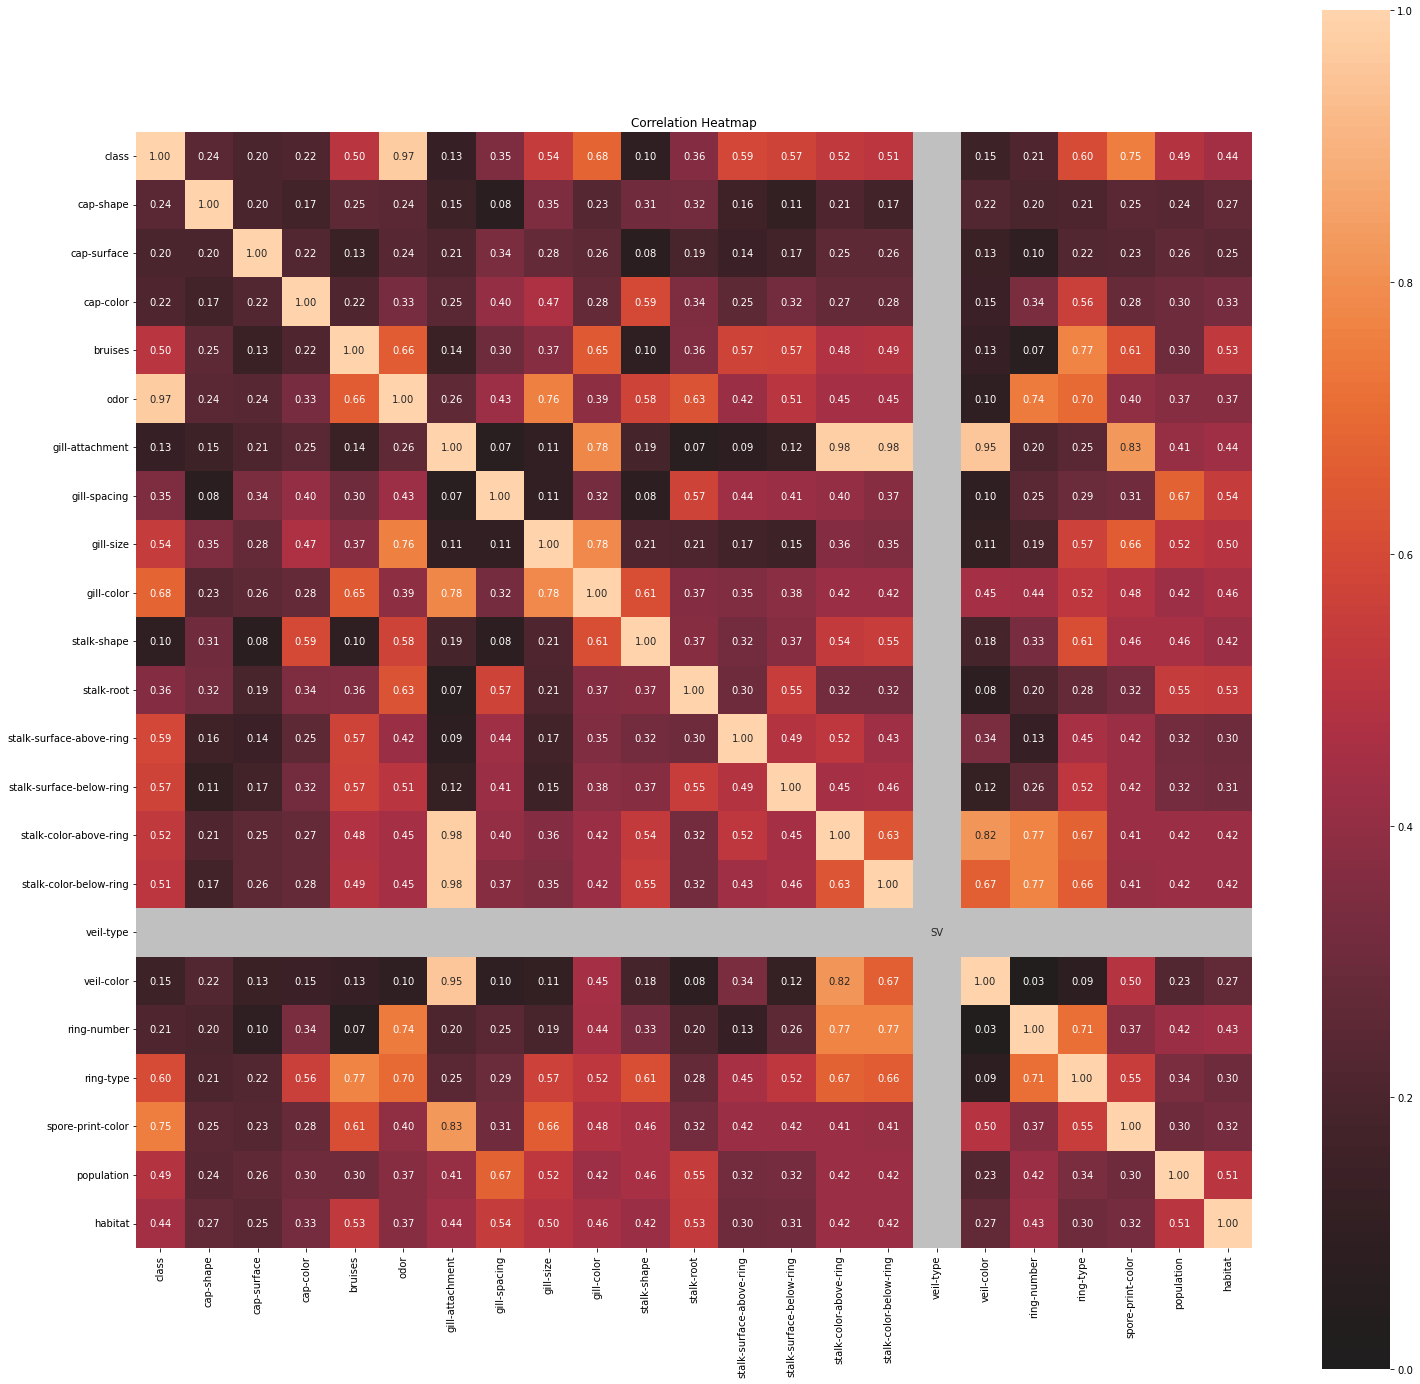

{'corr':                              class  cap-shape  cap-surface  cap-color  \
 class                     1.000000   0.244330     0.195997   0.215889   
 cap-shape                 0.244330   1.000000     0.202242   0.168221   
 cap-surface               0.195997   0.202242     1.000000   0.222841   
 cap-color                 0.215889   0.168221     0.222841   1.000000   
 bruises                   0.501188   0.254415     0.133004   0.215101   
 odor                      0.970558   0.243577     0.236416   0.330517   
 gill-attachment           0.127951   0.152989     0.209977   0.245736   
 gill-spacing              0.347897   0.077849     0.337696   0.398593   
 gill-size                 0.539677   0.345956     0.276765   0.469156   
 gill-color                0.679877   0.232274     0.255023   0.280178   
 stalk-shape               0.101170   0.306119     0.076395   0.594499   
 stalk-root                0.360578   0.317190     0.193212   0.344527   
 stalk-surface-above-ring  0.5

In [13]:
nominal.associations(df, nominal_columns='auto', 
             mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson',figsize=(25,25), 
             annot=True, fmt='.2f', cmap=None, sv_color='silver', cbar=True, vmax=1.0, 
             vmin=None, plot=True, compute_only=False, clustering=False, title='Correlation Heatmap')

From the above heatmap we can see that for column 'veil type' there is only a single value. Therefore that column can be removed from the dataset as it has no role. For column 'gill-attachment' there is high correlation with columns 'stalk-color-above-ring' and 'stalk-color-above-ring'. Hence that column also can be removed from dataset.

In [14]:
df.drop(columns=['stalk-color-above-ring','stalk-color-below-ring','veil-type'],axis=1,inplace=True)
df.shape

(8124, 20)

In [15]:
df['class']=df['class'].map({'p':0,'e':1})
df['class'].value_counts()

1    4208
0    3916
Name: class, dtype: int64

In [16]:
X=df.drop('class',axis=1)
y=df['class']

### Feature encoding

In [17]:
X=pd.get_dummies(X,drop_first=True)
pd.pandas.set_option('display.max_columns',None)
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_t,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
X.shape

(8124, 78)

### Train test splitting

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3,stratify = y) #30% data is for testing
print(y_train.value_counts())
print(y_test.value_counts())

1    2945
0    2741
Name: class, dtype: int64
1    1263
0    1175
Name: class, dtype: int64


### Modelling

In [20]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [21]:

models = {
    '     Gaussian Naive Bayes' : GaussianNB(),
    '  Multinomial Naive Bayes' : MultinomialNB(),
    '    Bernoulli Naive Bayes' : BernoulliNB(),
    '  Categorical Naive Bayes' : CategoricalNB(),
    '      Logistic Regression' : LogisticRegression(),
    '     KNeighborsClassifier' : KNeighborsClassifier(),
}

In [22]:

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' is trained.')

     Gaussian Naive Bayes is trained.
  Multinomial Naive Bayes is trained.
    Bernoulli Naive Bayes is trained.
  Categorical Naive Bayes is trained.
      Logistic Regression is trained.
     KNeighborsClassifier is trained.
               SVC Linear is trained.
           SVC Polynomial is trained.
                  SVC RBF is trained.
 Decision Tree Classifier is trained.
 Random Forest Classifier is trained.


In [23]:

def get_accuracy_score(y_test,prediction):
    accuracy = accuracy_score(y_test,prediction)
    return accuracy
def get_precision_score(y_test,prediction):
    precision = precision_score(y_test,prediction)
    return precision
def get_recall_score(y_test,prediction):
    recall = recall_score(y_test,prediction)
    return recall
def get_f1_score(y_test,prediction):
    f1 = f1_score(y_test,prediction)
    return f1
def get_cross_val_score(model,X_train,y_train):
    cross_val_scores = cross_val_score(model,X_train,y_train,cv=10)
    avg_cross_val_score=cross_val_scores.mean()
    return avg_cross_val_score
def get_roc_auc_score(y_test,prediction):
    roc_auc = roc_auc_score(y_test,prediction)
    return roc_auc

In [24]:

met= pd.DataFrame(columns = [ "Accuracy", "F1_score","Recall","Precision", "Cross_validation","ROC_AUC"],
                  index=['     Gaussian Naive Bayes','  Multinomial Naive Bayes','    Bernoulli Naive Bayes',
                        '  Categorical Naive Bayes','      Logistic Regression','     KNeighborsClassifier'])

,Confusion_matrix,Accuracy,F1_score,Recall,Precision,Cross_validation,ROC_AUC
Gaussian Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Multinomial Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bernoulli Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Categorical Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNeighborsClassifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVC Linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVC Polynomial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SVC RBF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Decision Tree Classifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
for name, model in models.items():
    prediction = model.predict(X_test)
    acc = get_accuracy_score(y_test, prediction)
    met.at[name,"Accuracy"]=acc
    f1 = get_f1_score(y_test, prediction)
    met.at[name,"F1_score"]=f1
    recal = get_recall_score(y_test, prediction)
    met.at[name,"Recall"]=recal
    prec = get_precision_score(y_test, prediction)
    met.at[name,"Precision"]=prec
    xval = get_cross_val_score(model,X_train,y_train)
    met.at[name,"Cross_validation"]=xval
    roc = get_roc_auc_score(y_test, prediction)
    met.at[name,"ROC_AUC"]=roc
met   

,Confusion_matrix,Accuracy,F1_score,Recall,Precision,Cross_validation,ROC_AUC
Gaussian Naive Bayes,"[[1174, 1], [7, 1256]]",0.996719,0.996825,0.994458,0.999204,0.994195,0.996803
Multinomial Naive Bayes,"[[1091, 84], [0, 1263]]",0.965546,0.967816,1.0,0.937639,0.957088,0.964255
Bernoulli Naive Bayes,"[[1052, 123], [7, 1256]]",0.946678,0.950795,0.994458,0.910805,0.944248,0.944888
Categorical Naive Bayes,"[[1052, 123], [7, 1256]]",0.946678,0.950795,0.994458,0.910805,0.944248,0.944888
Logistic Regression,"[[1174, 1], [0, 1263]]",0.99959,0.999604,1.0,0.999209,0.999648,0.999574
KNeighborsClassifier,"[[1175, 0], [0, 1263]]",1.0,1.0,1.0,1.0,1.0,1.0
SVC Linear,"[[1175, 0], [0, 1263]]",1.0,1.0,1.0,1.0,1.0,1.0
SVC Polynomial,"[[1175, 0], [0, 1263]]",1.0,1.0,1.0,1.0,1.0,1.0
SVC RBF,"[[1175, 0], [0, 1263]]",1.0,1.0,1.0,1.0,1.0,1.0
Decision Tree Classifier,"[[1175, 0], [0, 1263]]",1.0,1.0,1.0,1.0,1.0,1.0


From the above table it is seen that KNeighbours, SVC, Decision Tree and Random Forest Classifiers are giving the best results. From among the Naive Bayes classifiers the Gaussian model gives better results.